<a href="https://colab.research.google.com/github/Sudhanshu-Mittal-2024/Deep_Learning_Projects/blob/main/music_genres_identification_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q --show-progress -O genres.tar.gz https://www.dropbox.com/scl/fi/logv7hsjc1t3daaysuhyh/genres.tar.gz?rlkey=vcu3jvliyletkjwxz8bv8jm7c&e=1&dl=0

genres.tar.gz       100%[===================>]   1.14G  45.9MB/s    in 26s     


In [2]:
import tarfile
file = tarfile.open('genres.tar.gz')
file.extractall('/content/')
file.close()

In [3]:
import numpy as np
import pandas as pd
import os
import shutil

In [36]:
music_genre_classes=os.listdir('/content/genres')
filenames = []
for cl in music_genre_classes:
  filenames = filenames + ['/content/genres/'+cl+'/'+file for file in os.listdir('/content/genres/'+cl+'/')]

In [5]:
filenames

['/content/genres/classical/classical.00066.au',
 '/content/genres/classical/classical.00032.au',
 '/content/genres/classical/classical.00058.au',
 '/content/genres/classical/classical.00088.au',
 '/content/genres/classical/classical.00048.au',
 '/content/genres/classical/classical.00078.au',
 '/content/genres/classical/classical.00092.au',
 '/content/genres/classical/classical.00052.au',
 '/content/genres/classical/classical.00022.au',
 '/content/genres/classical/classical.00047.au',
 '/content/genres/classical/classical.00018.au',
 '/content/genres/classical/classical.00026.au',
 '/content/genres/classical/classical.00095.au',
 '/content/genres/classical/classical.00004.au',
 '/content/genres/classical/classical.00023.au',
 '/content/genres/classical/classical.00082.au',
 '/content/genres/classical/classical.00060.au',
 '/content/genres/classical/classical.00014.au',
 '/content/genres/classical/classical.00025.au',
 '/content/genres/classical/classical.00096.au',
 '/content/genres/cl

In [14]:
data = {'Genre': [file.split('/')[3] for file in filenames], 'File': filenames}
labels_data = pd.DataFrame(data, columns=['Genre', 'File'])

In [16]:
import librosa
import numpy as np
from tensorflow.keras import layers,models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [19]:
le=LabelEncoder()
labels_data['classID']=le.fit_transform(labels_data['Genre'])

In [24]:
n_mfcc=40
num_time_windows=180
batch_size=32
epochs=30
num_classes=10
sr=16000
data_dir='/content/genres'

In [25]:
def extract_mfcc(file_path,sr=sr,n_mfcc=n_mfcc,max_len=num_time_windows):

  audio,_=librosa.load(file_path,sr=sr)
  mfcc=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=n_mfcc)

  if mfcc.shape[1]<max_len:
    pad_len=max_len-mfcc.shape[1]
    mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_len)),mode='constant')

  else:
    mfcc=mfcc[:,:max_len]
  return mfcc

In [27]:
x=[]
y=[]

for _,row in labels_data.iterrows():
  file_path=os.path.join(row['File'])
  mfcc=extract_mfcc(file_path)
  x.append(mfcc)
  y.append(row['classID'])

In [29]:
x=np.array(x)
y=to_categorical(y,num_classes=num_classes)

In [30]:
x.shape,y.shape

((1000, 40, 180), (1000, 10))

In [31]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
def build_model(input_shape):

  model=models.Sequential([
                            layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Conv2D(64,(3,3),activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Conv2D(128,(3,3),activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Flatten(),
                            layers.Dense(256,activation='relu'),
                            layers.Dropout(0.4),
                            layers.Dense(num_classes,activation='softmax')

                          ]

                          )
  return model

In [33]:
model=build_model((n_mfcc,num_time_windows,1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x,y,epochs=epochs,batch_size=batch_size)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 575ms/step - accuracy: 0.1696 - loss: 6.2790
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 620ms/step - accuracy: 0.3968 - loss: 1.6820
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 573ms/step - accuracy: 0.4881 - loss: 1.3928
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 559ms/step - accuracy: 0.5774 - loss: 1.1813
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 570ms/step - accuracy: 0.6610 - loss: 0.9369
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 537ms/step - accuracy: 0.7171 - loss: 0.8299
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 572ms/step - accuracy: 0.7452 - loss: 0.7450
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - accuracy: 0.8125 - loss: 0.5039
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 572ms/step - accuracy: 0.8469 - loss: 0.4217
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.8975 - loss: 0.3125
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 567ms/step - accuracy: 0.8922 - loss: 0.3398
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 178, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 178, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 43, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 41, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 41, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 20, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7680)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,966,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,186,528 (23.60 MB)

 Trainable params: 2,062,026 (7.87 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 4,124,054 (15.73 MB)

In [40]:
model.save('/content/music_genres_identification_project_2.keras')

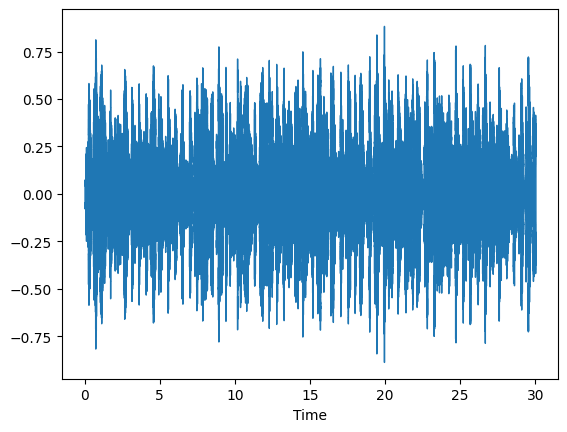

In [50]:
from IPython.display import Audio
my_audio='/content/genres/blues/blues.00000.au'
Audio(my_audio)
my_y,my_sr = librosa.load(my_audio)
librosa.display.waveshow(my_y,sr=my_sr)

In [56]:
my_audio='/content/genres/blues/blues.00000.au'

# Extract MFCCs from the audio file
mfcc = extract_mfcc(my_audio)

# Reshape MFCCs to match the model's input shape (add batch dimension)
mfcc = mfcc[np.newaxis, ..., np.newaxis]

# Now you can predict
predictions = model.predict(mfcc)

pred_cat=np.argmax(predictions)
# Print or process the predictions
print(pred_cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0
